In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =fetch_california_housing()

In [4]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
# print(data.DESCR)

# Attribute Information:

    # - MedInc        median income in block group
    # - HouseAge      median house age in block group
    # - AveRooms      average number of rooms per household
    # - AveBedrms     average number of bedrooms per household
    # - Population    block group population
    # - AveOccup      average number of household members
    # - Latitude      block group latitude
    # - Longitude     block group longitude


In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
# divide data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# split dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [14]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

In [30]:
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [34]:
# model building 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
model.coef_

array([ 0.83265521,  0.12186056, -0.2692169 ,  0.31217484, -0.00634786,
       -0.04074974, -0.90369005, -0.8787625 ])

In [ ]:
model.intercept_

2.0765314825581394

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [83]:
mean_squared_error(y_test, y_pred)

0.5296293151408235

In [84]:
mean_absolute_error(y_pred, y_test)

0.5352476763196591

In [85]:
r2_score(y_pred,y_test)

0.37757774651944653

In [78]:
# Assumption
error = y_test - y_pred

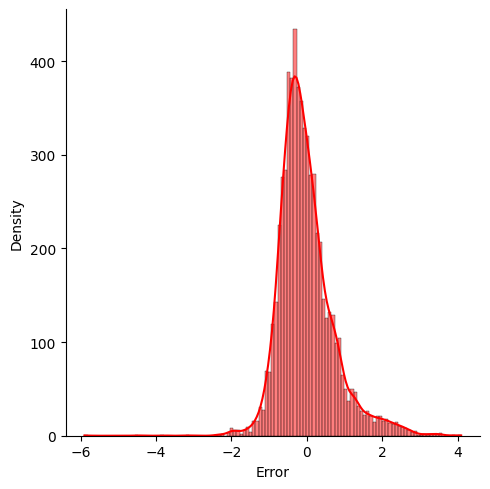

In [75]:
# plt.plot(X_test, error, linewidth=3)
sns.displot(error, kde=True, color='r')
plt.xlabel('Error')
plt.ylabel("Density")
plt.show()

In [86]:
import pickle

In [88]:
# Pickle>> allows to store python abject on the disk

# 1. Serialization ➡ Converting a Python object → byte stream or string (so it can be saved or sent).Used when you want to save data to a file, send over a network, or store in a database.

# 2. Deserialization ➡ Converting a byte stream → original Python object (loading it back).

In [89]:
pickle.dump(model, open("model.pkl", "wb"))